# Keras Introdution

In [15]:
# Todas as bibliotecas que serão utilizadas

import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from tensorflow.keras.models import load_model
from tensorflow import keras

In [16]:
# Biblioteca que será utilizada 

dataset = keras.datasets.fashion_mnist
((train_x, train_y), (test_x, test_y)) = dataset.load_data()

# Normalizando  os dados 

train_x = train_x/float(250)

# Lista não númerica igualmente indexada dos classificadores do Dataset

y_list_dataset = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

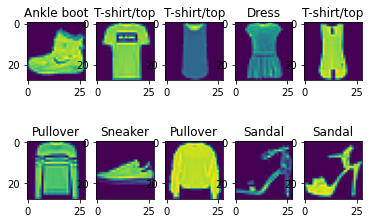

In [17]:
# Visualizando os dados do nosso dataset

for c in range(10):

    plt.subplot(2, 5, c+1)
    plt.imshow(train_x[c])
    plt.title(y_list_dataset[train_y[c]])

In [33]:
# Definindo, compilando, treinando, testando e medindo nosso modelo

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation= tf.nn.softmax)
    ])

adam = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False, name = "Adam")

callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss'), keras.callbacks.ModelCheckpoint(filepath = 'best_model.hdf5', 
                                                                monitor = 'val_loss', save_best_only = True)]

model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

history = model.fit(train_x, train_y, epochs= 10, validation_split = 0.2, batch_size = 500, callbacks = callbacks)

model.predict(test_x)

Epoch 1/10
96/96 [==============================] - 1s 10ms/step - loss: 0.8425 - accuracy: 0.7091 - val_loss: 0.5309 - val_accuracy: 0.8209
Epoch 2/10
96/96 [==============================] - 0s 5ms/step - loss: 0.5222 - accuracy: 0.8207 - val_loss: 0.4697 - val_accuracy: 0.8355


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
# Gráfico de accuracy do modelo 

fig = go.Figure()
fig.add_trace(go.Scatter(x = history.epoch, y = history.history['accuracy'], name = 'Train'))
fig.add_trace(go.Scatter(x = history.epoch, y = history.history['val_accuracy'], name = 'Validation'))
fig.update_layout(dict(
    title = 'Accuraccy by epoch',
    xaxis_title = 'Epoch',
    yaxis_title = 'Accuracy'
    )) 
fig.show()

In [29]:
# Gráfico de loss do modelo 

fig = go.Figure()
fig.add_trace(go.Scatter(x =  history.epoch, y = history.history['loss'], name = 'Train'))
fig.add_trace(go.Scatter(x = history.epoch, y = history.history['val_loss'], name = 'Validation'))

fig.update_layout(dict(
    title = 'Loss by epoch',
    xaxis_title = 'Epoch',
    yaxis_title = 'Loss'
))
fig.show()

In [30]:
# Verificando o Sumário do nosso modelo 

model_summary = model.summary()

# Obtendo os pesos do nosso modelo 

model_layers_dense01_weights = model.layers[1].get_weights()[0]

# Obtendo os vieses do nosso modelo

model_layers_dense01_bias = model.layers[1].get_weights()[1]

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Carregando nosso melhor modelo 

saved_model = load_model('best_model.hdf5')

# Predicting with Keras

In [11]:
# Importando todas as bibliotecas que serão utilizadas

import pandas as pd
import numpy as np
import plotly.graph_objects as go 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Random State

#SEED = 52
#np.random.seed = SEED

# Cursor

scaler = StandardScaler()

In [12]:
# Importando o database que será utilizado as db

db_raw = pd.read_csv('G:\Meu Drive\My Repositories\My Laboratory\Jupyter Lab\databases\datasets\\airline_passangers.csv')
db = pd.read_csv('G:\Meu Drive\My Repositories\My Laboratory\Jupyter Lab\databases\datasets\\airline_passangers.csv')

In [13]:
db_raw_x = db.drop(columns = ['passageiros'])
db_raw_y = db.drop(columns = ['tempo'])

# Normalizando os dados do nosso database

scaler.fit(db_raw_x.values)
db['tempo'] = scaler.transform(db_raw_x)

scaler.fit(db_raw_y.values)
db['passageiros'] = scaler.transform(db_raw_y)

# Separando dados de treino e teste

db_x = db['tempo']
db_y = db['passageiros']

train_x, test_x, train_y, test_y = train_test_split(db_x, db_y, test_size= 0.2)

In [14]:
# Visualizando o gráfico do database

fig = go.Figure()
    
fig.add_trace(go.Scatter(x = db_raw['tempo'], y = db_raw['passageiros'], name = 'Passangers'))

fig.update_layout(dict(
    title = 'Passangers by year',
    xaxis_title = 'Year',
    yaxis_title = 'Passangers',
    width = 1000,
    height = 400,
    font_size = 12.5
))

fig.show()

In [15]:
# Visualizando o gráfico de treino e teste do modelo

fig = go.Figure()

fig.add_trace(go.Scatter(x = db_raw_x['tempo'], y = train_y, name = 'Train'))
fig.add_trace(go.Scatter(x = db_raw_x['tempo'], y = test_y, name = 'Test'))

fig.update_layout(dict(
    title = 'Passangers by year',
    xaxis_title = 'Year',
    yaxis_title = 'Passangers',
    font_size = 12.5
))

fig.show()